In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


In [2]:
#Load the data using pandas read_csv function. This will generate a data frame we will use through the work.
X = pd.read_csv('defenders_rating_saves_X.csv')
y = pd.read_csv('defenders_rating_saves_y.csv')

In [3]:
#Show the first and last few records to check data is loading correctly
print(X.head())
print(y.tail())

   matches_played  aerials_l  aerials_w   assists  chances2score  clearances  \
0             1.0        0.0        0.0  0.054054       0.084577    0.031250   
1             0.0        1.0        0.0  0.027027       0.054726    0.018750   
2             1.0        0.0        0.0  0.135135       0.099502    0.157812   
3             1.0        0.0        0.0  0.054054       0.019900    0.004687   
4             0.0        0.0        1.0  0.054054       0.094527    0.037500   

   countattack  crosses_acc  crosses_inacc  dangmistakes  ...  \
0          0.0     0.000000       0.162162      0.162791  ...   
1          0.0     0.000000       0.051351      0.034884  ...   
2          0.0     0.178571       0.202703      0.127907  ...   
3          0.0     0.000000       0.081081      0.034884  ...   
4          0.0     0.047619       0.081081      0.000000  ...   

   betweenness_centrality  closeness_centrality  flow_centrality  \
0                0.120301              0.114286         0.49

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

X.dtypes

matches_played            float64
aerials_l                 float64
aerials_w                 float64
assists                   float64
chances2score             float64
clearances                float64
countattack               float64
crosses_acc               float64
crosses_inacc             float64
dangmistakes              float64
drib_success              float64
drib_unsuccess            float64
dribbled_past             float64
fouls                     float64
goals                     float64
grduels_l                 float64
grduels_w                 float64
interceptions             float64
keypasses                 float64
lballs_acc                float64
lballs_inacc              float64
missed_penalties          float64
offsides                  float64
owngoals                  float64
passes_acc                float64
passes_inacc              float64
poss_lost                 float64
rcards                    float64
shots_offtarget           float64
shots_ontarget

In [5]:
import pandas as pd

# Assuming X_train_corr is your DataFrame
df = X

# Iterate through each column and check for columns with a single unique value
single_value_columns = [column for column in df.columns if df[column].nunique() == 1]

# Print columns with a single unique value
print("Columns with a single unique value:")
for column in single_value_columns:
    print(column)

Columns with a single unique value:


In [6]:
X.shape

(653, 48)

In [7]:
X.columns

Index(['matches_played', 'aerials_l', 'aerials_w', 'assists', 'chances2score',
       'clearances', 'countattack', 'crosses_acc', 'crosses_inacc',
       'dangmistakes', 'drib_success', 'drib_unsuccess', 'dribbled_past',
       'fouls', 'goals', 'grduels_l', 'grduels_w', 'interceptions',
       'keypasses', 'lballs_acc', 'lballs_inacc', 'missed_penalties',
       'offsides', 'owngoals', 'passes_acc', 'passes_inacc', 'poss_lost',
       'rcards', 'shots_offtarget', 'shots_ontarget', 'shotsblocked',
       'stop_shots', 'tballs_acc', 'tballs_inacc', 'touches', 'wasfouled',
       'ycards', 'degree_centrality', 'betweenness_centrality',
       'closeness_centrality', 'flow_centrality', 'betweenness2goals',
       'game_duration', 'flow_success', 'minutesPlayed', 'pos_role_DC',
       'pos_role_DL', 'pos_role_DR'],
      dtype='object')

In football (soccer), player positions are grouped into four main categories: Goalkeepers, Defenders, Midfielders, and Forwards. Each of the columns you mentioned in your dataset corresponds to a specific position within these categories. Here’s a detailed breakdown:

Goalkeepers (GK)
GK (Goalkeeper): The primary role is to prevent the opposing team from scoring by guarding the goal. Goalkeepers are the only players allowed to use their hands, but only within the penalty area.
Defenders
LB (Left Back): A defender positioned on the left side, responsible for preventing opposition attacks down the right wing.
LCB (Left Center Back): A central defender on the left side of the defense.
CB (Center Back): Central defenders who protect the area directly in front of the goal.
RCB (Right Center Back): A central defender on the right side of the defense.
RB (Right Back): A defender positioned on the right side, responsible for preventing opposition attacks down the left wing.
LWB (Left Wing Back): Similar to a left back but with more offensive duties, often seen in formations with three central defenders.
RWB (Right Wing Back): Similar to a right back but with more offensive duties, often seen in formations with three central defenders.
Midfielders
CDM (Center Defensive Midfielder): Positioned in front of the defenders, focusing on intercepting the ball and breaking up opposition plays.
LDM (Left Defensive Midfielder): A defensive midfielder on the left side.
RDM (Right Defensive Midfielder): A defensive midfielder on the right side.
CM (Center Midfielder): Plays centrally, linking defense and attack, often covering both defensive and offensive roles.
LCM (Left Center Midfielder): A central midfielder leaning towards the left.
RCM (Right Center Midfielder): A central midfielder leaning towards the right.
CAM (Center Attacking Midfielder): Positioned behind the forwards, focusing on creating scoring opportunities.
LAM (Left Attacking Midfielder): An attacking midfielder on the left side.
RAM (Right Attacking Midfielder): An attacking midfielder on the right side.
LM (Left Midfielder): Positioned on the left side of the midfield, balancing defense and attack.
RM (Right Midfielder): Positioned on the right side of the midfield, balancing defense and attack.
Forwards
ST (Striker): The primary goal-scorer, positioned closest to the opponent's goal.
LS (Left Striker): A forward on the left side of the attack.
RS (Right Striker): A forward on the right side of the attack.
CF (Center Forward): Similar to a striker but may play slightly deeper, involved in both scoring and assisting.
LF (Left Forward): Positioned on the left side, slightly behind the main striker.
RF (Right Forward): Positioned on the right side, slightly behind the main striker.
LW (Left Winger): Positioned on the left wing, focused on delivering crosses and creating scoring opportunities from wide positions.
RW (Right Winger): Positioned on the right wing, focused on delivering crosses and creating scoring opportunities from wide positions.
These groupings ensure a balanced distribution of responsibilities on the field, with each position playing a crucial role in the team's overall strategy​ (Football Guide)​​ (Jobs In Football)​​ (Soccermodo)​.

https://www.football-guide.com/soccer-info/soccer-positions-explained.html

https://jobsinfootball.com/blog/soccer-positions/

https://soccermodo.com/soccer-positions/






In [8]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd


# Perform feature selection using SelectKBest with f_regression
selector = SelectKBest(score_func=f_regression, k='all')  # Select all features
selector.fit(X, y)

# Get the scores of each feature
scores = selector.scores_

# Create a DataFrame for better visualization
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False).reset_index(drop=True)

# Display the ranked features
print(feature_scores)

                   Feature        Score
0               lballs_acc  3002.204260
1             lballs_inacc  2734.601158
2          shots_offtarget  2661.867533
3        degree_centrality  2243.219006
4                 owngoals  1943.007401
5                  assists  1915.899888
6           shots_ontarget  1867.868890
7                keypasses  1851.975975
8                grduels_w  1734.517619
9                 offsides  1677.540124
10           chances2score  1624.110261
11                  rcards  1454.150283
12           crosses_inacc  1402.386641
13               grduels_l  1293.250129
14              clearances  1027.073379
15                 touches   779.292732
16            dangmistakes   747.638946
17  betweenness_centrality   711.525141
18              stop_shots   559.788240
19    closeness_centrality   526.645814
20                  ycards   482.413248
21             crosses_acc   445.902200
22              tballs_acc   287.969304
23                   fouls   287.142962


C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_regression


# Perform feature selection using SelectKBest with mutual_info_regression
selector = SelectKBest(score_func=mutual_info_regression, k='all')  # Select all features
selector.fit(X, y)

# Get the scores of each feature
scores = selector.scores_

# Create a DataFrame for better visualization
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False).reset_index(drop=True)

# Display the ranked features
print(feature_scores)

C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                   Feature     Score
0               lballs_acc  1.104650
1        degree_centrality  0.824772
2          shots_offtarget  0.821264
3           shots_ontarget  0.774516
4             lballs_inacc  0.771827
5                  assists  0.765915
6                keypasses  0.721460
7                 offsides  0.701368
8                   rcards  0.696811
9                 owngoals  0.657104
10               grduels_w  0.651028
11           chances2score  0.640399
12              clearances  0.613896
13           crosses_inacc  0.612333
14               grduels_l  0.582017
15  betweenness_centrality  0.546212
16                 touches  0.472746
17              stop_shots  0.368278
18            dangmistakes  0.359138
19             crosses_acc  0.321504
20    closeness_centrality  0.309350
21                  ycards  0.287222
22                   fouls  0.282646
23              tballs_acc  0.249823
24           minutesPlayed  0.231824
25             pos_role_DR  0.210535
2

C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                   Feature  Importance
0               lballs_acc    0.192008
1             lballs_inacc    0.188600
2          shots_offtarget    0.103803
3        degree_centrality    0.082147
4                 owngoals    0.065989
5                  assists    0.065745
6                keypasses    0.060999
7           shots_ontarget    0.042233
8           matches_played    0.034535
9            chances2score    0.026635
10                offsides    0.023173
11           crosses_inacc    0.019545
12               grduels_w    0.014677
13              clearances    0.011012
14               grduels_l    0.006321
15                  rcards    0.005469
16                 touches    0.004385
17            dangmistakes    0.003403
18             pos_role_DR    0.003125
19             pos_role_DL    0.002625
20          drib_unsuccess    0.002298
21  betweenness_centrality    0.002295
22                   fouls    0.002238
23                   goals    0.002010
24       betweenness2goal

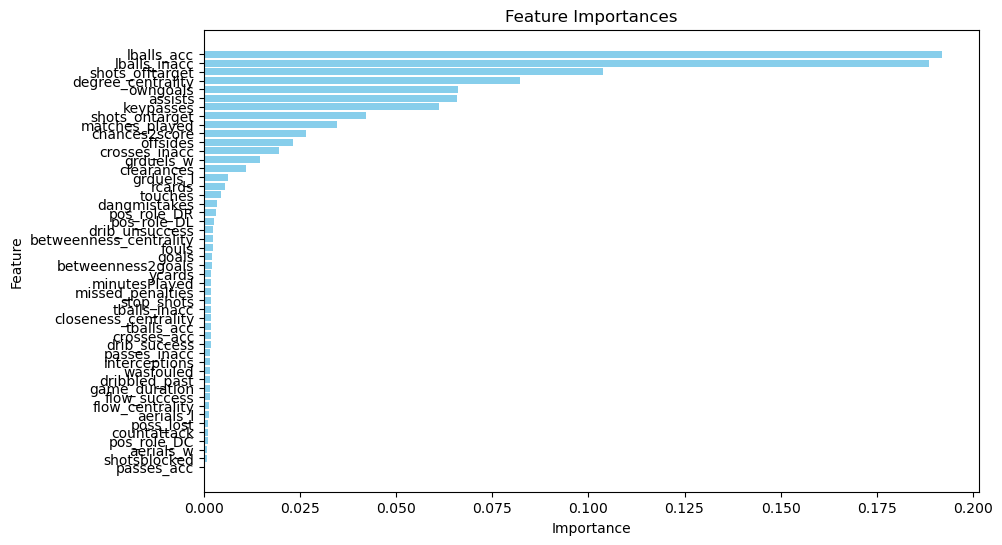

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

# Fit an ExtraTreesRegressor model
model = ExtraTreesRegressor(random_state=42)
model.fit(X, y)

# Get the feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the ranked features
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [11]:
import pandas as pd

# Combine X and y into a single DataFrame
data = pd.concat([X, y], axis=1)

# Calculate the correlation matrix
data.corr()

,matches_played,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,goals,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,missed_penalties,offsides,owngoals,passes_acc,passes_inacc,poss_lost,rcards,shots_offtarget,shots_ontarget,shotsblocked,stop_shots,tballs_acc,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,game_duration,flow_success,minutesPlayed,pos_role_DC,pos_role_DL,pos_role_DR,tackles
matches_played,1.000000,-0.592364,-0.592364,0.150200,0.254917,0.327388,-0.136302,0.179330,0.326381,-0.002880,-0.428882,-0.475687,0.149507,-0.187769,-0.317679,0.027612,0.151797,0.203670,-0.038479,-0.012515,0.100971,-0.316213,0.280072,0.209632,-0.023893,-0.047350,0.106743,0.217796,0.079964,-0.024000,0.031114,0.095487,0.179262,-0.118311,0.372137,0.001070,0.083141,0.121746,0.027609,0.147474,-0.001170,-0.131100,-0.262338,-0.136634,-0.035352,-0.005963,0.001013,0.011745,0.201951
aerials_l,-0.592364,1.000000,-0.298211,-0.100871,-0.174143,-0.211058,0.085300,-0.068717,-0.207690,0.001965,0.267389,0.318547,-0.094739,0.094006,0.177103,-0.031784,-0.117725,-0.111837,-0.020179,-0.004349,-0.081136,0.200657,-0.166237,-0.122960,0.014153,-0.039279,-0.076538,-0.132522,-0.056709,0.012233,-0.030912,-0.017142,-0.098552,0.130096,-0.245472,-0.025759,-0.057390,-0.079758,-0.073799,-0.115019,-0.004697,0.080364,0.138560,0.089076,0.043070,0.016976,-0.011726,-0.002525,-0.135939
aerials_w,-0.592364,-0.298211,1.000000,-0.077075,-0.127864,-0.176807,0.076180,-0.143741,-0.178983,0.001446,0.240719,0.245012,-0.082386,0.128450,0.199260,-0.000929,-0.062113,-0.129456,0.065766,0.019176,-0.038487,0.173970,-0.165573,-0.125397,0.014153,0.095375,-0.049923,-0.125507,-0.038027,0.016200,-0.005950,-0.095985,-0.113825,0.010070,-0.195409,0.024491,-0.041109,-0.064478,0.041090,-0.059697,0.006082,0.074954,0.172239,0.072798,-0.001188,-0.009912,0.010526,-0.011390,-0.103317
assists,0.150200,-0.100871,-0.077075,1.000000,0.863937,0.807948,0.350860,0.668456,0.867342,0.712815,0.347295,0.377083,0.527675,0.547603,0.406617,0.759301,0.780161,0.437208,0.860861,0.835727,0.913037,0.352597,0.829165,0.882439,0.055966,0.469737,0.216981,0.846458,0.919185,0.902415,0.114882,0.706608,0.581132,0.507877,0.755489,0.445887,0.616441,0.907418,0.717391,0.646642,-0.009116,0.043342,-0.046939,-0.050580,0.092453,-0.136829,-0.029356,0.034342,0.863937
chances2score,0.254917,-0.174143,-0.127864,0.863937,1.000000,0.883786,0.209641,0.686584,0.869134,0.636063,0.154205,0.162401,0.496023,0.430878,0.256257,0.705352,0.765967,0.453355,0.772060,0.745029,0.844967,0.201014,0.814202,0.837869,0.002700,0.454442,0.202963,0.775508,0.846646,0.796009,0.100541,0.678280,0.599637,0.389570,0.793257,0.380282,0.544867,0.820015,0.673877,0.615284,0.029947,0.065188,-0.062471,-0.052075,0.064718,-0.076281,-0.031709,0.098004,0.844902
clearances,0.327388,-0.211058,-0.176807,0.807948,0.883786,1.000000,0.172917,0.741220,0.888843,0.558853,0.046927,0.044623,0.535770,0.364225,0.152045,0.611988,0.717888,0.539747,0.663934,0.667074,0.792267,0.111142,0.801129,0.794897,-0.002761,0.420624,0.181102,0.757804,0.770590,0.715268,0.123271,0.688156,0.677257,0.348561,0.831952,0.331113,0.475773,0.781325,0.638563,0.607154,0.041998,0.046690,-0.078815,-0.058815,0.073810,-0.060437,0.001325,0.084201,0.782340
countattack,-0.136302,0.085300,0.076180,0.350860,0.209641,0.172917,1.000000,0.246411,0.192991,0.420827,0.660704,0.597385,0.229652,0.421256,0.436464,0.380987,0.285528,0.184525,0.411607,0.426254,0.343247,0.629279,0.302392,0.336746,0.081715,0.240914,0.034105,0.387769,0.415919,0.479930,0.004677,0.286894,0.196976,0.232706,0.128586,0.407902,0.407538,0.440660,0.398633,0.236930,0.088459,0.037018,0.111259,0.114049,0.332595,-0.017277,0.109206,0.042349,0.287609
crosses_acc,0.179330,-0.068717,-0.143741,0.668456,0.686584,0.741220,0.246411,1.000000,0.681663,0.553841,0.192845,0.212443,0.432

<Axes: >

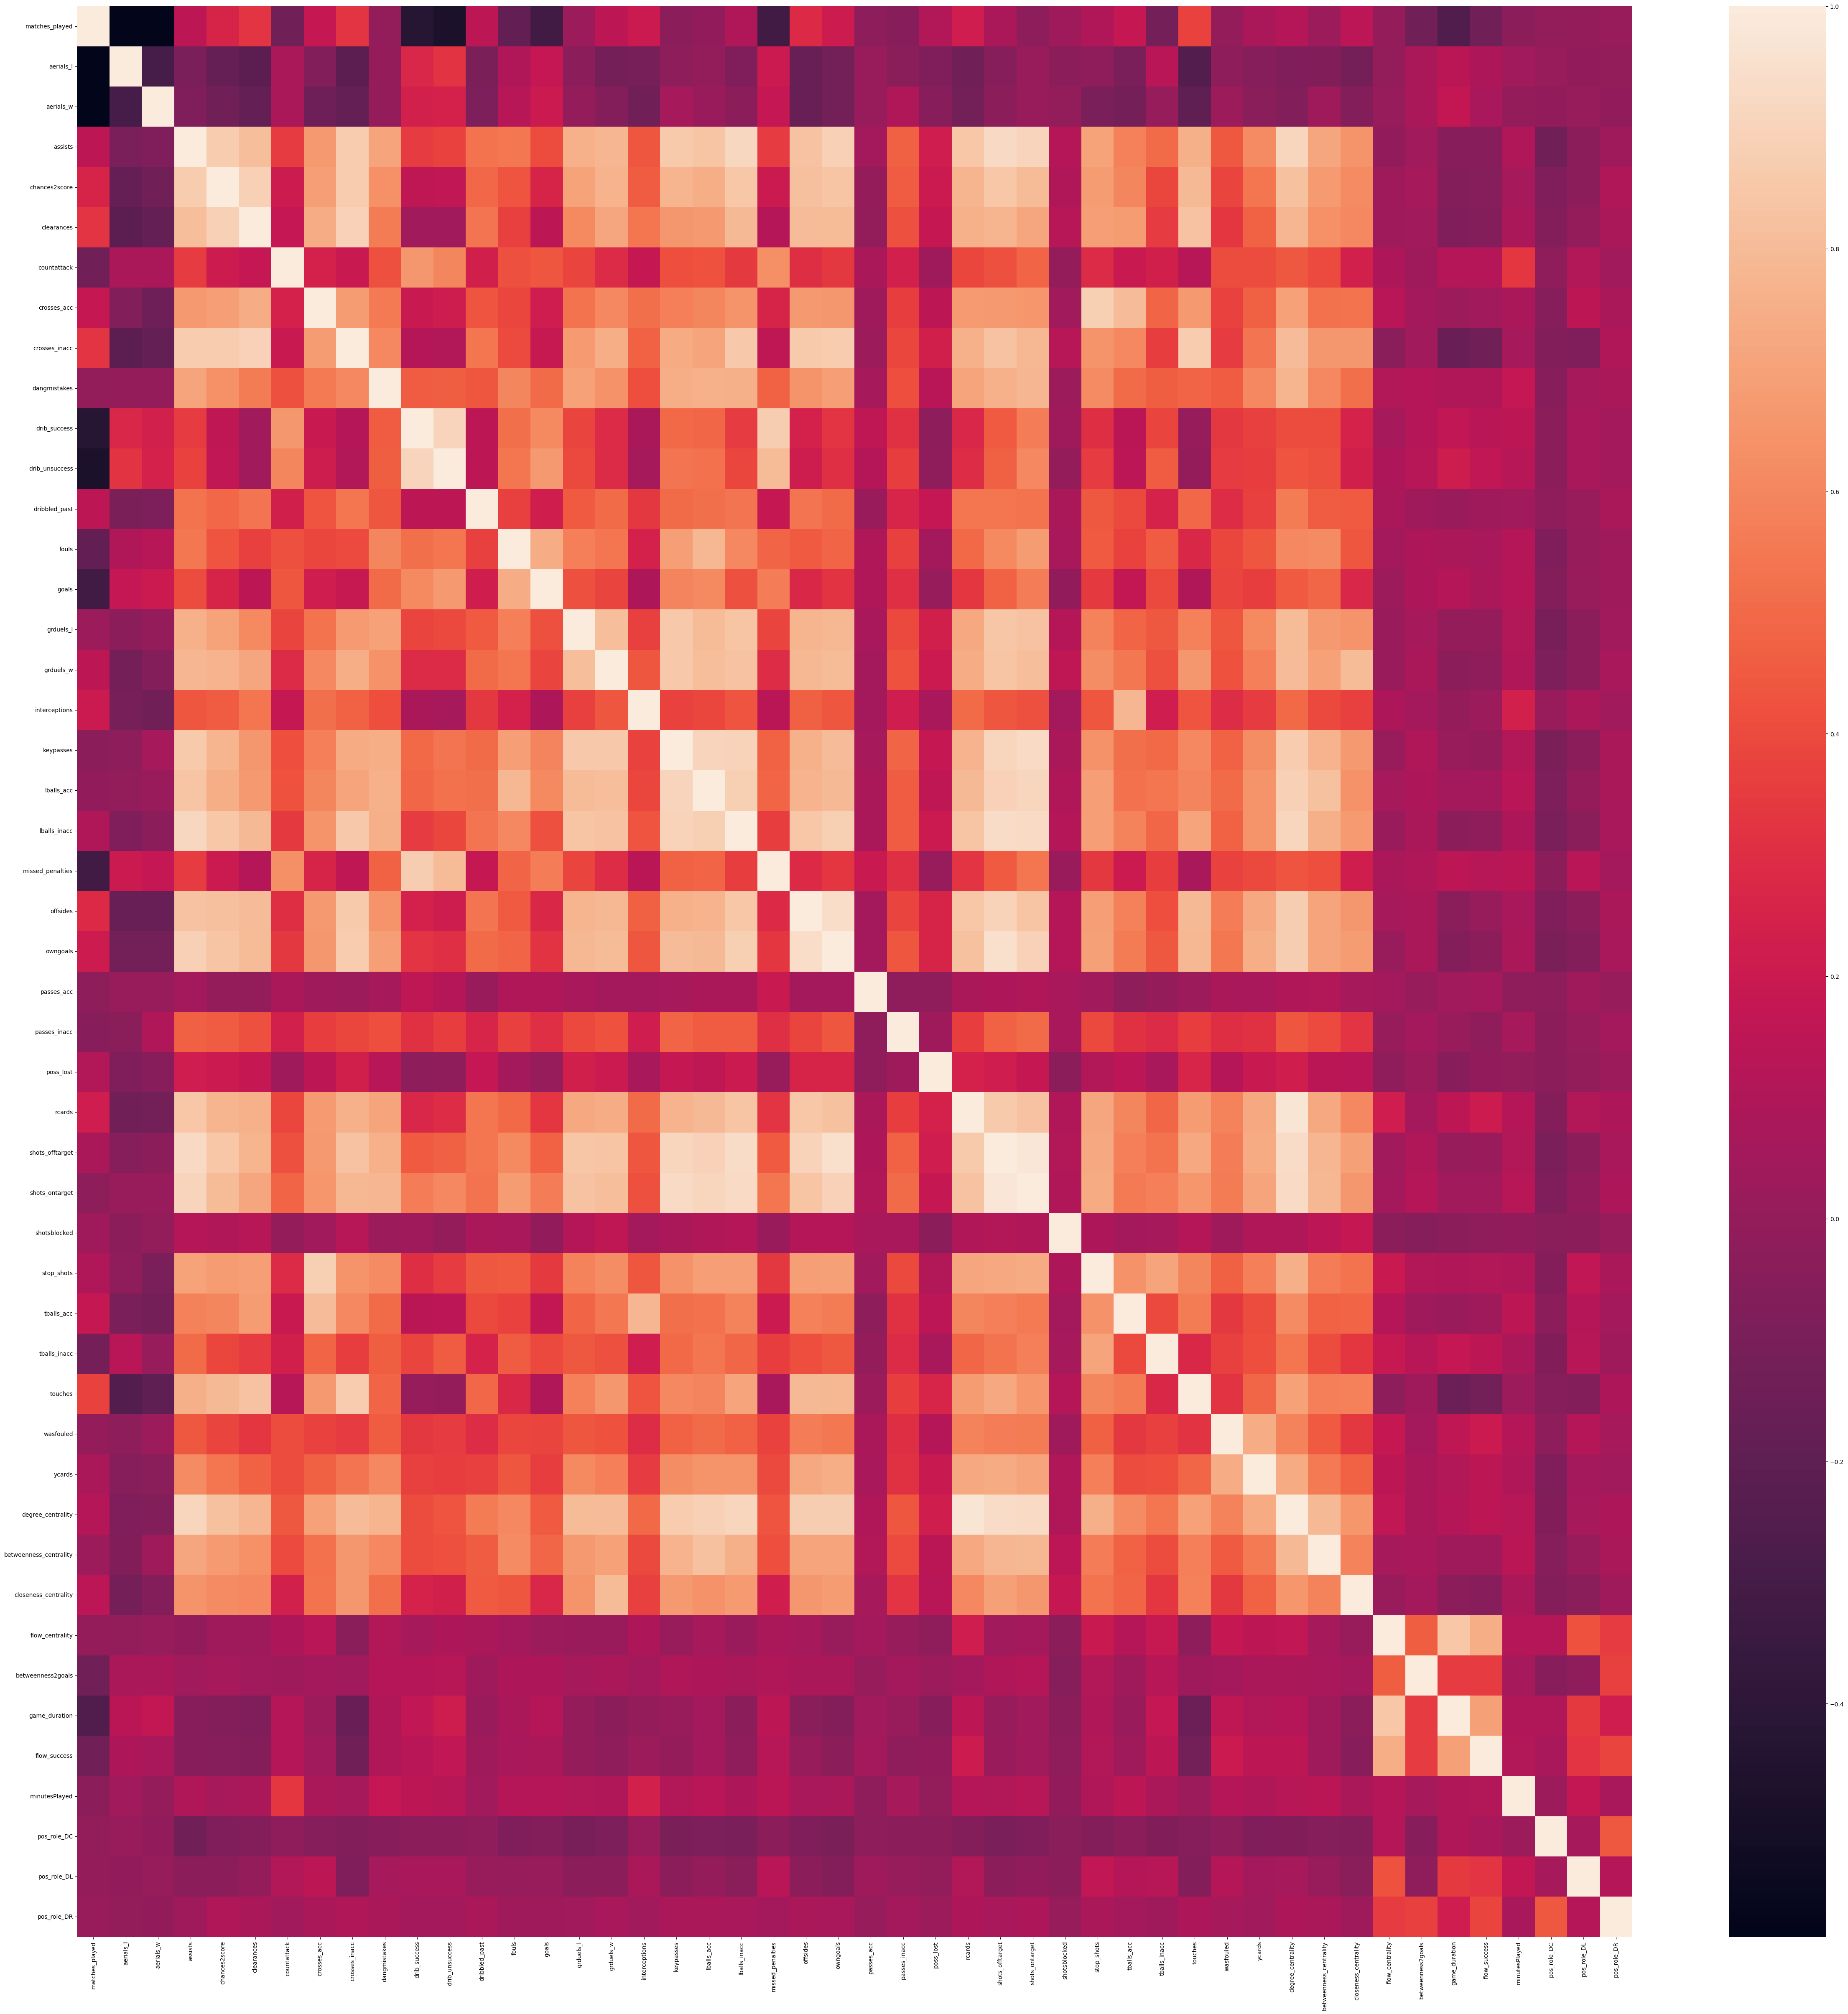

In [12]:
corr = data.drop(columns=['tackles'], axis=1).corr()
top_features = corr.index
plt.figure(figsize=(60,60))
sns.heatmap(data[top_features].corr(), annot=False)

In [13]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [15]:
threshold = 0.8
correlation(data.drop(columns=['tackles'], axis=1), threshold)

{'betweenness_centrality',
 'chances2score',
 'clearances',
 'crosses_inacc',
 'degree_centrality',
 'drib_unsuccess',
 'game_duration',
 'grduels_w',
 'keypasses',
 'lballs_acc',
 'lballs_inacc',
 'missed_penalties',
 'offsides',
 'owngoals',
 'rcards',
 'shots_offtarget',
 'shots_ontarget',
 'stop_shots',
 'tballs_acc',
 'touches'}

In [16]:
#check the columns to know which other they are correlated with
#check the columns to know which other they are correlated with
def correlated_columns(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    correlated_pairs = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname1 = corr_matrix.columns[i]
                colname2 = corr_matrix.columns[j]
                col_corr.add(colname1)
                col_corr.add(colname2)
                correlated_pairs.append((colname1, colname2, corr_matrix.iloc[i, j]))

    return col_corr, correlated_pairs

In [17]:
threshold = 0.8
col_corr, correlated_pairs = correlated_columns(data.drop(columns=['tackles'], axis=1), threshold)

print("Highly correlated columns:")
print(col_corr)

print("\nPairs of highly correlated columns with their correlation coefficients:")
for pair in correlated_pairs:
    print(pair)

Highly correlated columns:
{'drib_unsuccess', 'assists', 'drib_success', 'lballs_inacc', 'keypasses', 'shots_ontarget', 'rcards', 'stop_shots', 'tballs_acc', 'grduels_l', 'clearances', 'lballs_acc', 'degree_centrality', 'crosses_inacc', 'flow_centrality', 'crosses_acc', 'owngoals', 'chances2score', 'game_duration', 'shots_offtarget', 'betweenness_centrality', 'touches', 'grduels_w', 'offsides', 'missed_penalties'}

Pairs of highly correlated columns with their correlation coefficients:
('chances2score', 'assists', 0.8639373128061384)
('clearances', 'assists', 0.8079480650985815)
('clearances', 'chances2score', 0.8837861970603139)
('crosses_inacc', 'assists', 0.8673420208558486)
('crosses_inacc', 'chances2score', 0.8691339682254863)
('crosses_inacc', 'clearances', 0.8888430446596588)
('drib_unsuccess', 'drib_success', 0.904280055806279)
('grduels_w', 'grduels_l', 0.8100931831267556)
('keypasses', 'assists', 0.860860554393355)
('keypasses', 'grduels_l', 0.8526405791227396)
('keypasses', 

In [43]:
# Save X and y to CSV files
#change to goalkeeprs features later
#X.to_csv('defenders_featusres.csv', index=False)
#y.to_csv('defenders_target.csv', index=False)

#print("Files saved: 'defenders_features.csv' and 'defenders_target.csv'")

Files saved: 'defenders_features.csv' and 'defenders_target.csv'


In [ ]:
#for feature enginnering, we can do averages of players of different matches in the same season